## Imports

In [52]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

# Importando o módulo do PCA
from sklearn.decomposition import PCA
# Importando numpy
import numpy as np

# Importando Matplotlib para plots
import matplotlib.pyplot as plt

# Importando a separação entre dados de treino e teste
from sklearn.model_selection import train_test_split

# Importando o Regressor Linear, RMSE e o Regressor de Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Definindo a seed para calculos aleatorios
subset_seed = 97404

## Funções

In [14]:
# Remove todos os dados não numericos do DataFrame
def remove_not_numbers(df):
    df_c = df.copy()
    for i in df_c.columns:
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            df_c = df_c.drop([i], axis=1)
        else:
            continue
    return df_c

In [33]:
# Plot da variância explicada pelo número de componentes
def plot_components(x, y):
    PCAs = []
    n_components = [i for i in range(9)]
    
    for n in n_components:
        # Calculo do PCA com n_components componentes
        pca = PCA(n_components=n)
        # Ajuste do PCA
        pca.fit(x)
        # Realização da transformação PCA
        x_pca = pca.transform(x)
        PCAs.append(np.sum(pca.explained_variance_ratio_))
    
    fig, ax = plt.subplots()
    ax.plot(n_components, PCAs)

## Lendo o DataFrame e removendo dados não numericos

In [15]:
# Lendo o DataFrame
df = pd.read_csv('Final Data.csv', index_col='Unnamed: 0')

# Convertendo os tipos dos dados para melhor utilização
df = df.convert_dtypes()

# Removendo dados não numericos
df = remove_not_numbers(df)

# Mostrando o DataFrame
df

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
7,84.94,14,163,1022,0.0,80,5,1,10,0,-4
8,84.22,14,163,1022,0.0,80,5,1,10,0,-4
9,83.49,14,163,1022,0.0,80,5,1,10,0,-4
10,82.77,14,163,1022,0.0,80,5,1,10,0,-4
11,82.05,28,109,1013,0.0,80,37,1,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,-23,-36
225,-72.6,30,121,1002,0.0,60,46,1,10,-23,-36
226,-73.3,30,121,1002,0.0,60,46,1,10,-23,-36
227,-74.1,30,121,1002,0.0,60,46,1,10,-23,-36


## Normalizando o DataFrame e separando as Features

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Definindo colunas que serão utilizadas como features
features = ["latitude", "wind_speed", "wind_degree", "pressure", "humidity", "cloudcover", "uv_index", "visibility"]

# Definindo o Normalizador
scaler = MinMaxScaler()

# Normalizando o DataFrame utilizando apenas as features
norm = scaler.fit_transform(df[features].values)

# Mostrando o DataFrame Normalizado
norm

array([[1.        , 0.21276596, 0.45378151, ..., 0.05      , 0.        ,
        1.        ],
       [0.99549268, 0.21276596, 0.45378151, ..., 0.05      , 0.        ,
        1.        ],
       [0.99092275, 0.21276596, 0.45378151, ..., 0.05      , 0.        ,
        1.        ],
       ...,
       [0.00939026, 0.55319149, 0.33613445, ..., 0.46      , 0.        ,
        1.        ],
       [0.00438212, 0.55319149, 0.33613445, ..., 0.46      , 0.        ,
        1.        ],
       [0.        , 0.55319149, 0.33613445, ..., 0.46      , 0.        ,
        1.        ]])

## Criação de um DataFrame próprio dos dados normalizados

In [18]:
# Criando o DataFrame a partir de um numpy array
df_norm = pd.DataFrame(norm, columns=features)

# Concatenando a coluna temperature ao DataFrame normalizado
df_norm = pd.concat([df_norm, pd.Series(df['temperature']).reset_index(drop=True)], axis=1)

# Mostrando o DataFrame normalizado com todas as features e o price
df_norm.head(10)

,latitude,wind_speed,wind_degree,pressure,humidity,cloudcover,uv_index,visibility,temperature
0,1.000000,0.212766,0.453782,1.00,0.782609,0.05,0.0,1.0,0
1,0.995493,0.212766,0.453782,1.00,0.782609,0.05,0.0,1.0,0
2,0.990923,0.212766,0.453782,1.00,0.782609,0.05,0.0,1.0,0
3,0.986415,0.212766,0.453782,1.00,0.782609,0.05,0.0,1.0,0
4,0.981908,0.510638,0.302521,0.55,0.782609,0.37,0.0,1.0,5
5,0.977401,0.510638,0.302521,0.55,0.782609,0.37,0.0,1.0,5
6,0.972831,0.510638,0.302521,0.55,0.782609,0.37,0.0,1.0,5
7,0.968324,0.510638,0.302521,0.55,0.782609,0.37,0.0,1.0,5
8,0.963816,0.404255,0.165266,0.45,0.858696,0.93,0.0,1.0,4
9,0.959246,0.404255,0.165266,0.45,0.858696,0.93,0.0,1.0,4


## Realizando o PCA

In [43]:
# Definindo o X como as features
x = df_norm[features]
# Definindo o Y como a temperatura (target)
y = df_norm['temperature']

# Calculo do PCA com 3 componentes
pca = PCA(n_components=3)
# Ajuste do PCA
pca.fit(x)
# Realização da transformação PCA
x_pca = pca.transform(x)

In [44]:
# Calculandoa variância explicada para 3 componentes
print(np.sum(pca.explained_variance_ratio_))

0.7391564806599186


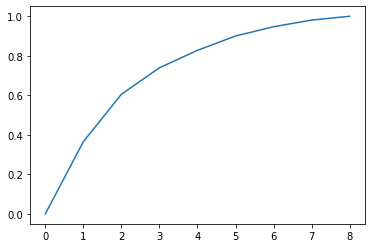

In [46]:
# Mostrando a variança de cada número de componentes
plot_components(x, y)

## Separando os dados em Treino e Teste

In [50]:
# Separação dos dados em x e y de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=2, random_state=subset_seed)

## Criação de um DataFrame para facilitar a visualização e calcular a correlação

In [51]:
df_pca_train = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca_train['temperature'] = y
print(df_pca_train.head(10))
corrmat = df_pca_train.corr()
print(round(corrmat, 4))

        PC1       PC2       PC3  temperature
0  0.131237 -0.020890  0.118915            0
1  0.130047 -0.022895  0.118677            0
2  0.128841 -0.024928  0.118435            0
3  0.127651 -0.026933  0.118197            0
4  0.339151 -0.007259 -0.217759            5
5  0.337961 -0.009264 -0.217997            5
6  0.336755 -0.011297 -0.218239            5
7  0.335565 -0.013302 -0.218477            5
8  0.732716  0.010630 -0.467725            4
9  0.731510  0.008597 -0.467967            4
                PC1     PC2    PC3  temperature
PC1          1.0000 -0.0000 -0.000      -0.3686
PC2         -0.0000  1.0000  0.000       0.4154
PC3         -0.0000  0.0000  1.000       0.2740
temperature -0.3686  0.4154  0.274       1.0000


## Finalmente a Regressão Linear

In [53]:
# Criando o modelo de regressão linear
modelo_linear = LinearRegression()

# Treinando o modelo
modelo_linear.fit(x_train, y_train)

# Utilizando o modelo para prever os daods
y_previsao = modelo_linear.predict(x_test)

# Calculo do RMSE do modelo
RMSE = mean_squared_error(y_test, y_previsao, squared=False)

# Mostrando o valor de RMSE
print(f'O RMSE do modelo linear foi de {RMSE} graus.')

O RMSE do modelo linear foi de 0.2866954794137484 graus.


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Random Forest

In [54]:
# Criando o modelo de floresta aleatoria
modelo_rf = RandomForestRegressor(random_state=subset_seed)

# Treinando o modelo
modelo_rf.fit(x_train, y_train)

# Utilizando o modelo para prever os dados
y_previsao = modelo_rf.predict(x_test)

# Calculando o RMSE
RMSE = mean_squared_error(y_test, y_previsao, squared=False)

print(f'O RMSE do modelo de floresta aleatoria foi de {RMSE} graus.')

O RMSE do modelo de floresta aleatoria foi de 1.413523965131118 graus.


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
